# PYTHON COMO FERRAMENTA DE ENGENHARIA

## UNIVERSIDADE ANHEMBI MORUMBI - UAM
### Prof. Dr.  Thiago Garcia João
### Prof. Dr. Roberto E. Oshiro
### Prof. MSc. José Francisco C. B. Jr.
#### Escola de Engenharia e Tecnologia

### Objetivo: Analisar um ciclo de Rankine Simples via Linguagem Python no Ambiente Jupyter Notebook.

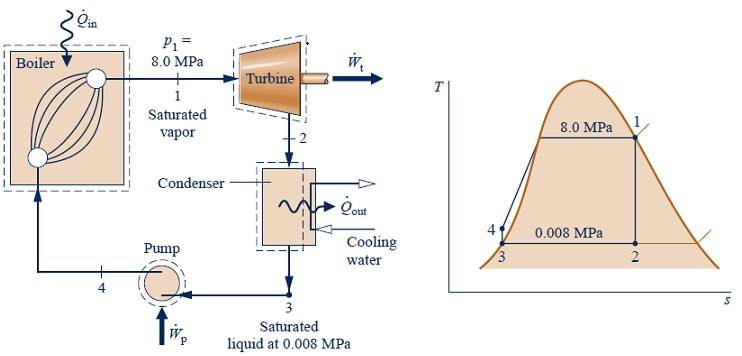

In [1]:
from IPython.display import Image
Image("/Users/thgarciaj/Desktop/PYTHON_SE_2019/rankine81.jpg")

1 - Importando a biblioteca com propriedades dos fluidos CoolProp (http://www.coolprop.org), assim, não é necessário ficar consultando as tabelas termodinâmicas, acelerando o desenvolvimento do projeto.

In [2]:
from CoolProp import CoolProp as cp

2 - Em um problema como este, necessitamos definir as transformações termodinâmicas que ocorrem em cada um dos elementos do ciclo (i.e, bomba, aquecedor, turbina e condensador). Podemos assim prosseguir, utilizando a primeira lei da termodinâmica para volumes de controle, em regime permanente:

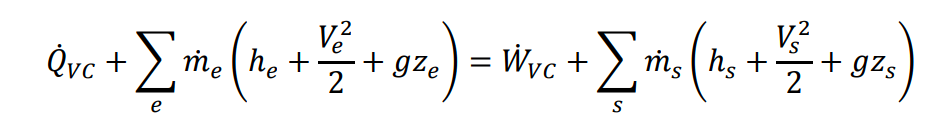

In [3]:
Image("/Users/thgarciaj/Desktop/PYTHON_SE_2019/primeira_lei.png")

2.1 - Processos Termodinâmicos:

3 para 4 : transformação isentrópica (s3 = s4);
4 para 1 : transformação isobárica (P4 = P1);
1 para 2 : transformação isentrópica (s2 = s1);
2 para 3 : transformação isobárica (P2 = P3).

2.2 - Considerações sobre os componentes do ciclo:
    * Bomba e turbina adiabáticas;
    * Processos internos reversíveis;
    * Energias cinética e potencial desprezíveis;
    * Vapor saturado na entrada da turbina e líquido saturado na saída do condensador;


3 - Modelagem do Ciclo:

3.1 - Bomba (transformação isentrópica)

In [4]:
P4 = 8        #MPa
P3 = 0.008    #Mpa

s3 = cp.PropsSI('S', 'Q', 0, 'P', P3 * 1E6, 'water')  * 1E-3
s4 = s3
h4 = cp.PropsSI('H', 'P', P4 * 1E6, 'S', s4 * 1E3, 'water') * 1E-3
T4 = cp.PropsSI('T', 'P', P4 * 1E6, 'S', s4 * 1E3, 'water')
h3 = cp.PropsSI('H', 'P', P3 * 1E6, 'Q', 0, 'water')  * 1E-3
T3 = cp.PropsSI('T', 'P', P3 * 1E6, 'Q', 0, 'water')
W_B = h3 - h4

print('A entropia s3 e s4, em Kj/kg-k, valem, respectivamente {:.3f} e {:.3f}'.format(s3,s4))
print('A entalpia h4, vale, em kJ/kg: {:.3f}'.format(h4))
print('As temperatura T3 e T4, valem, em C, respectivamente {:.1f} e {:.1f}'.format((T3 - 273.15), (T4 - 273.15)))
print('O trabalho realizado no ciclo pela bomba, vale, em kJ/kg: {:.1f}'.format(W_B))

A entropia s3 e s4, em Kj/kg-k, valem, respectivamente 0.592 e 0.592
A entalpia h4, vale, em kJ/kg: 181.886
As temperatura T3 e T4, valem, em C, respectivamente 41.5 e 41.8
O trabalho realizado no ciclo pela bomba, vale, em kJ/kg: -8.0


3.2 - Aquecedor (transformação isobárica)

In [5]:
P1 = P4
s1 = cp.PropsSI('S', 'Q', 1, 'P', P1 * 1E6, 'water') * 1E-3
h1 = cp.PropsSI('H', 'Q', 1, 'P', P1 * 1E6, 'water') * 1E-3
T1 = cp.PropsSI('T', 'Q', 1, 'P', P1 * 1E6, 'water')
qq = h1 - h4
print('A entropia s1, vale, em kJ/kg-K: {:.3f}'.format(s1))
print('A entropia h1, vale, em kJ/kg: {:.3f}'.format(h1))
print('A temperatura T1 vale, em C, {:.2f}'.format(T1 - 273.15))
print('O calor trocado no aquecedor vale, em kJ/kg: {:.1f}'.format(qq))

A entropia s1, vale, em kJ/kg-K: 5.745
A entropia h1, vale, em kJ/kg: 2758.683
A temperatura T1 vale, em C, 295.01
O calor trocado no aquecedor vale, em kJ/kg: 2576.8


3.3 - Turbina (transformação isentrópica)

In [6]:
s2 = s1
P2 = P3
h2 = cp.PropsSI('H', 'P', P2 * 1E6, 'S', s2 *1E3, 'water') * 1E-3
T2 = cp.PropsSI('T', 'P', P2 * 1E6, 'S', s2 *1E3, 'water')
W_T = h1 - h2
print('A temperatura T2 vale, em C, {:.2f}'.format(T2 - 273.15))
print('A entropia h2, vale, em kJ/kg: {:.3f}'.format(h2))
print('O trabalho realizado pela tubina, vale, em kJ/kg: {:.1f}'.format(W_T))

A temperatura T2 vale, em C, 41.51
A entropia h2, vale, em kJ/kg: 1795.119
O trabalho realizado pela tubina, vale, em kJ/kg: 963.6


In [7]:
qf = h3 - h2 
print('O calor regeitado no condensador, vale, em kJ/kg: {:.1f}'.format(qf))

O calor regeitado no condensador, vale, em kJ/kg: -1621.3


In [8]:
eficiencia = (W_T + W_B) / qq
print('A eficiência do ciclo vale: {:.1f}%'.format(eficiencia * 100))

A eficiência do ciclo vale: 37.1%


4 - Diagrama T-s

Importando a biblioteca gráfica matplotlib (https://matplotlib.org/) e a biblioteca numérica numpy (http://www.numpy.org/)

5 -Construindo o diagrama T - s:

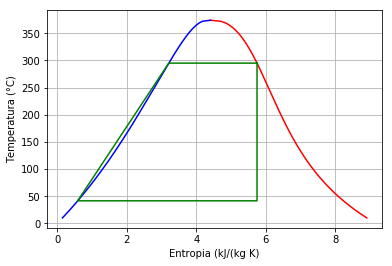

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

""" Sino de saturação """
npt = np.linspace(10,647.096 - 273.15,200)
svap = [s for s in [cp.PropsSI('S', 'T', j + 273.15, 'Q', 1, 'water') * 1E-3 for j in npt]]
sliq = [s for s in [cp.PropsSI('S', 'T', j + 273.15, 'Q', 0, 'water') * 1E-3 for j in npt]]
plt.plot(svap, npt, 'r-')
plt.plot(sliq, npt, 'b-')

""" Determinação do par T,s não utilizado acima para o uso no plot"""
T5 = cp.PropsSI('T', 'Q', 0, 'P', P4 *1E6, 'water')
s5 = cp.PropsSI('S', 'Q', 0, 'P', P4 *1E6, 'water') * 1E-3


""" Conjunto de ponto em T e em s"""
t = [T1 - 273.15, T2 - 273.15, T3 - 273.15, T4 - 273.15, T5 - 273.15, T1 - 273.15] 
s = [s1, s2, s3, s4, s5, s1]

plt.plot(s, t, 'g')
plt.xlabel('Entropia (kJ/(kg K)')
plt.ylabel('Temperatura (°C)')
plt.savefig('Rankine.png', transparent = True)
plt.grid()
plt.show()

In [10]:
from bokeh.plotting import *

# Criando um arquivo estático em html
output_file("Rankine.html")

output_notebook()

p = figure(plot_width=600, plot_height=600, toolbar_location='below')

p.title.text = 'Diagrama T-s (Ciclo Rankine)'
p.title.align = 'center'
p.title.text_color = 'orange'
p.title.text_font_size = '30px'
p.xaxis[0].axis_label = 'Temperatura (°C)'
p.yaxis[0].axis_label = 'Entropia (kJ/(kg K)'


p.line(sliq, npt, legend = 'Curva de Líquido Saturado', line_width = 2, color = 'blue')
p.line(svap, npt, legend = 'Curva de Vapor Saturado', line_width = 2, color = 'red')


p.line(s, t, line_width = 2, color = 'green')

# Exibir o Gráfico
show(p)

Loading BokehJS ...

6 - Determinação da vazão mássica (Por unidade de Potência Gerada)

In [11]:
vazao_m_pot = 1 / (W_T - W_B) # Kg/kJ 

print('A vazão mássica por unidade de potência gerada será = {:.6f} Kg/kJ '.format(vazao_m_pot))

A vazão mássica por unidade de potência gerada será = 0.001029 Kg/kJ 


7 - Exemplo: se a potência líquida do ciclo for 100 MW

In [12]:
m_ponto   = vazao_m_pot * 100 * 1E3        # kg/s
m_ponto_h = vazao_m_pot * 100 * 1E3 * 3600 # Kg/h
vazao_Q   = m_ponto / cp.PropsSI('D', 'T', T2, 'Q', 1, 'water')


print('A vazão mássica vale {:.2f} Kg/s ou {:.2f} Kg/h'.format(m_ponto, m_ponto_h))
print('A potência da bomba, nesta configuração vale: {:.2f} kW'.format(W_B * m_ponto))
print('A vazão volumetrica vale {:.2f} m3/s'.format(vazao_Q))

A vazão mássica vale 102.92 Kg/s ou 370518.90 Kg/h
A potência da bomba, nesta configuração vale: -828.11 kW
A vazão volumetrica vale 1862.77 m3/s
